In [1]:
import numpy as np
import pandas as pd

filename ='Data/Fremont_Bridge_Bicycle_Counter.csv'

data = pd.read_csv(filename, index_col='Date', parse_dates=True)
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
Date,,,
2023-02-28 23:00:00,6.0,3.0,3.0
2023-02-28 22:00:00,14.0,5.0,9.0
2023-02-28 21:00:00,30.0,13.0,17.0
2023-02-28 20:00:00,37.0,22.0,15.0
2023-02-28 19:00:00,59.0,19.0,40.0


In [4]:
data.columns = ['Total','East', 'West']
data.head()

,Total,East,West
Date,,,
2023-02-28 23:00:00,6.0,3.0,3.0
2023-02-28 22:00:00,14.0,5.0,9.0
2023-02-28 21:00:00,30.0,13.0,17.0
2023-02-28 20:00:00,37.0,22.0,15.0
2023-02-28 19:00:00,59.0,19.0,40.0


In [5]:
data.dropna().describe()

,Total,East,West
count,91210.000000,91210.000000,91210.000000
mean,105.603859,47.193882,58.409977
std,133.270779,60.779588,82.619206
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,58.000000,26.000000,30.000000
75%,142.000000,65.000000,75.000000
max,1097.000000,698.000000,850.000000


Text(0, 0.5, 'Hourly Bicycle Count')

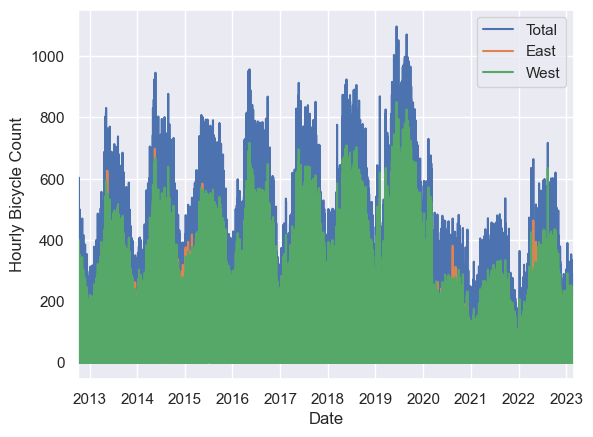

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Weekly Bicycle count')

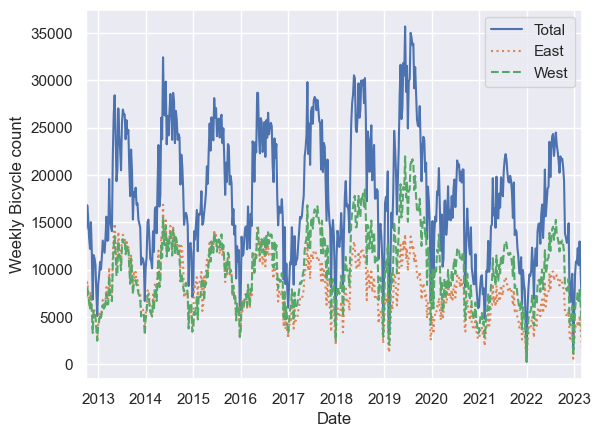

In [11]:
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'])
plt.ylabel('Weekly Bicycle count')

<Axes: xlabel='time'>

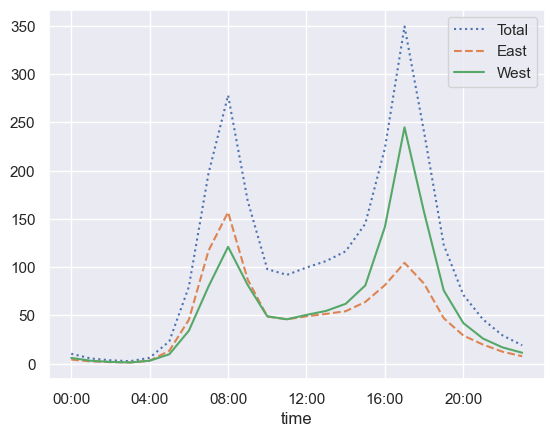

In [14]:
#Average traffic as function of the time of day
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

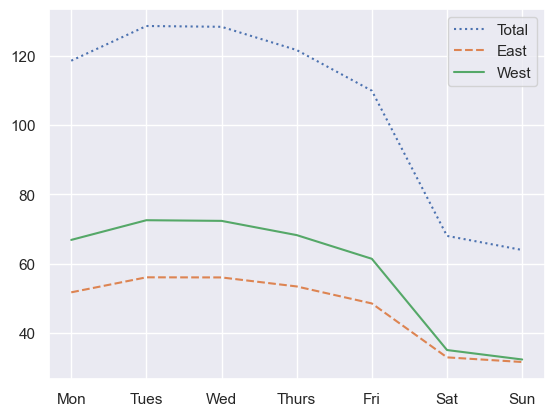

In [15]:
#Changes during the days of week
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);